## Disney Movies Project

### Problem Statement

How can we explain the consistent success of Disney movies by analysing their transcript?

## I. Data Management

### A. Data Scrapping

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle

In [2]:
def url_to_transcript(url):
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['http://www.fpx.de/fp/Disney/Scripts/Mulan.html',
        'http://www.fpx.de/fp/Disney/Scripts/SleepingBeauty/sb.html',
        'http://www.fpx.de/fp/Disney/Scripts/Aladdin.txt',
        'http://www.fpx.de/fp/Disney/Scripts/HunchbackOfNotreDame.txt',
        'http://www.fpx.de/fp/Disney/Scripts/LittleMermaid.html']

# movie names
movies = ['Mulan', 'Sleeping Beauty', 'Aladdin', 'Hunchback', 'Little Mermaid']

In [3]:
transcripts = [url_to_transcript(u) for u in urls]

http://www.fpx.de/fp/Disney/Scripts/Mulan.html
http://www.fpx.de/fp/Disney/Scripts/SleepingBeauty/sb.html
http://www.fpx.de/fp/Disney/Scripts/Aladdin.txt
http://www.fpx.de/fp/Disney/Scripts/HunchbackOfNotreDame.txt
http://www.fpx.de/fp/Disney/Scripts/LittleMermaid.html


In [4]:
# # Pickle files for later use

# # Make a new directory to hold the text files
!mkdir transcripts

for i, c in enumerate(movies):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)


A subdirectory or file transcripts already exists.


In [5]:
# Load pickled files
data = {}
for i, c in enumerate(movies):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [6]:
data.keys()

dict_keys(['Mulan', 'Sleeping Beauty', 'Aladdin', 'Hunchback', 'Little Mermaid'])

In [7]:
data['Mulan'][:10]

['The Complete Script',
 '\nTranscribed by Ash Ketchem.\n',
 '\n***\n',
 '\n***\n',
 '\n***\n',
 '\n     A girl can bring her family\n     Great honor in one way\n     By striking a good match\n     And this might be the day\n',
 '\n     We all must serve our Emperor\n     Who guards us from the Huns\n     A man by bearing arms\n     A girl by bearing sons\n',
 '\n     Scarier than the Undertaker,\n     We are meeting our matchmaker!\n     Destiny, guard our girls,\n     Help our future as it fast unfurls\n     Please look kindly on these cultured pearls\n     Each a perfect porcelain doll ...\n',
 '\n     Please bring honor to us\n     Please bring honor to us\n     Please bring honor to us\n     Please bring honor to us\n     Please bring honor to us all!\n\n',
 '\nMulan is greeted with a warm smile by her father, but, humiliated, she turns away and takes Khan to the stable.\n']

### B. Data Cleaning

In [8]:
next(iter(data.keys()))

'Mulan'

In [9]:
next(iter(data.values()))

['The Complete Script',
 '\nTranscribed by Ash Ketchem.\n',
 '\n***\n',
 '\n***\n',
 '\n***\n',
 '\n     A girl can bring her family\n     Great honor in one way\n     By striking a good match\n     And this might be the day\n',
 '\n     We all must serve our Emperor\n     Who guards us from the Huns\n     A man by bearing arms\n     A girl by bearing sons\n',
 '\n     Scarier than the Undertaker,\n     We are meeting our matchmaker!\n     Destiny, guard our girls,\n     Help our future as it fast unfurls\n     Please look kindly on these cultured pearls\n     Each a perfect porcelain doll ...\n',
 '\n     Please bring honor to us\n     Please bring honor to us\n     Please bring honor to us\n     Please bring honor to us\n     Please bring honor to us all!\n\n',
 '\nMulan is greeted with a warm smile by her father, but, humiliated, she turns away and takes Khan to the stable.\n',
 '\nBeginning of "Reflection"\n\n',
 "\n       Who is that girl I see\n       Staring straight back at me\

In [10]:
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

In [11]:
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [12]:
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
Aladdin,ALADDIN: THE COMPLETE SCRIPT\r\nCOMPILED BY BEN SCRIPPS <34RQNPQ@CMUVM.CSV.CMICH.EDU>\r\n(Portions Copyright (c) 1992 The Walt Disney Company)\r\...
Hunchback,DISNEY'S THE HUNCHBACK OF NOTRE DAME\n\n\nTranscribed by Ben Scripps (belledisny@aol.com)\n (34rqnpq@cmuvm.csv.cmich.e...
Little Mermaid,The Complete Script \n \n \n I've got gadgets and gizmos aplenty\n I've got whozits and whatzits galore\n[You want thingamabobs?\n I got twe...
Mulan,The Complete Script \nTranscribed by Ash Ketchem.\n \n***\n \n***\n \n***\n \n A girl can bring her family\n Great honor in one way\n ...
Sleeping Beauty,"\nWalt Disney's\nSleeping Beauty\n \nOnce upon a time, in a kingdom far away, a beautiful princess was born ...\na princess destined by a terrible..."


In [13]:
data_df.transcript.loc['Mulan']

'The Complete Script \nTranscribed by Ash Ketchem.\n \n***\n \n***\n \n***\n \n     A girl can bring her family\n     Great honor in one way\n     By striking a good match\n     And this might be the day\n \n     We all must serve our Emperor\n     Who guards us from the Huns\n     A man by bearing arms\n     A girl by bearing sons\n \n     Scarier than the Undertaker,\n     We are meeting our matchmaker!\n     Destiny, guard our girls,\n     Help our future as it fast unfurls\n     Please look kindly on these cultured pearls\n     Each a perfect porcelain doll ...\n \n     Please bring honor to us\n     Please bring honor to us\n     Please bring honor to us\n     Please bring honor to us\n     Please bring honor to us all!\n\n \nMulan is greeted with a warm smile by her father, but, humiliated, she turns away and takes Khan to the stable.\n \nBeginning of "Reflection"\n\n \n       Who is that girl I see\n       Staring straight back at me\n       Why is my reflection someone I don\'t

In [14]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)


In [15]:
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
Aladdin,aladdin the complete script\r\ncompiled by ben scripps \r\nportions copyright c the walt disney company\r\n\r\npeddler oh i come from a land\...
Hunchback,disneys the hunchback of notre dame\n\n\ntranscribed by ben scripps belledisnyaolcom\n \n\n\nnote the following scrip...
Little Mermaid,the complete script \n \n \n ive got gadgets and gizmos aplenty\n ive got whozits and whatzits galore\nyou want thingamabobs\n i got twenty\...
Mulan,the complete script \ntranscribed by ash ketchem\n \n\n \n\n \n\n \n a girl can bring her family\n great honor in one way\n by strikin...
Sleeping Beauty,\nwalt disneys\nsleeping beauty\n \nonce upon a time in a kingdom far away a beautiful princess was born \na princess destined by a terrible curse...


In [16]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [17]:
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
Aladdin,aladdin the complete script\rcompiled by ben scripps \rportions copyright c the walt disney company\r\rpeddler oh i come from a land\r fro...
Hunchback,disneys the hunchback of notre dametranscribed by ben scripps belledisnyaolcom note the following script is copyright...
Little Mermaid,the complete script ive got gadgets and gizmos aplenty ive got whozits and whatzits galoreyou want thingamabobs i got twenty but who ca...
Mulan,the complete script transcribed by ash ketchem a girl can bring her family great honor in one way by striking a good match and...
Sleeping Beauty,walt disneyssleeping beauty once upon a time in a kingdom far away a beautiful princess was born a princess destined by a terrible curse to prick ...



NOTE: This data cleaning aka text pre-processing step could go on for a while, but we are going to stop for now. After going through some analysis techniques, if you see that the results don't make sense or could be improved, you can come back and make more edits such as:

Mark 'cheering' and 'cheer' as the same word (stemming / lemmatization)
Combine 'thank you' into one term (bi-grams)
And a lot more...

### C. Data Organizing

#### Text Corpus

In [18]:
full_names = ['Aladdin', 'Hunchback','Little Mermaid', 'Mulan', 'Sleeping Beauty']
run_times = [91, 95, 85, 88, 76]

data_df['full_name'] = full_names
data_df

,transcript,full_name
Aladdin,ALADDIN: THE COMPLETE SCRIPT\r\nCOMPILED BY BEN SCRIPPS <34RQNPQ@CMUVM.CSV.CMICH.EDU>\r\n(Portions Copyright (c) 1992 The Walt Disney Company)\r\...,Aladdin
Hunchback,DISNEY'S THE HUNCHBACK OF NOTRE DAME\n\n\nTranscribed by Ben Scripps (belledisny@aol.com)\n (34rqnpq@cmuvm.csv.cmich.e...,Hunchback
Little Mermaid,The Complete Script \n \n \n I've got gadgets and gizmos aplenty\n I've got whozits and whatzits galore\n[You want thingamabobs?\n I got twe...,Little Mermaid
Mulan,The Complete Script \nTranscribed by Ash Ketchem.\n \n***\n \n***\n \n***\n \n A girl can bring her family\n Great honor in one way\n ...,Mulan
Sleeping Beauty,"\nWalt Disney's\nSleeping Beauty\n \nOnce upon a time, in a kingdom far away, a beautiful princess was born ...\na princess destined by a terrible...",Sleeping Beauty


In [19]:
data_df.to_pickle("corpus.pkl")

#### Document Term Matrix

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aaaaahhhhh,aawk,ababwa,abandoned,abject,able,abominationfrollo,abooboo,aboutfrollo,aboutmyself,...,zapped,zaps,zhou,zings,zips,zombie,zoo,zoom,zooms,zut
Aladdin,1,1,9,0,1,1,0,4,0,1,...,3,12,0,1,1,1,1,4,8,0
Hunchback,0,0,0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,2,1,0
Little Mermaid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Mulan,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
Sleeping Beauty,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data_dtm.to_pickle("dtm.pkl")

In [22]:
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

## II. EDA

### A. Most Common Words

In [23]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,Aladdin,Hunchback,Little Mermaid,Mulan,Sleeping Beauty
aaaaahhhhh,1,0,0,0,0
aawk,1,0,0,0,0
ababwa,9,0,0,0,0
abandoned,0,1,0,0,0
abject,1,0,0,0,0


In [24]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Aladdin': [('aladdin', 381),
  ('jafar', 197),
  ('jasmine', 194),
  ('abu', 166),
  ('genie', 164),
  ('sultan', 110),
  ('iago', 93),
  ('carpet', 89),
  ('im', 72),
  ('prince', 62),
  ('looks', 60),
  ('lamp', 57),
  ('oh', 57),
  ('like', 51),
  ('head', 44),
  ('just', 43),
  ('princess', 43),
  ('turns', 42),
  ('dont', 42),
  ('pulls', 41),
  ('ali', 40),
  ('look', 38),
  ('sees', 35),
  ('got', 35),
  ('away', 32),
  ('right', 31),
  ('man', 31),
  ('guards', 29),
  ('make', 29),
  ('cave', 29)],
 'Hunchback': [('phoebus', 72),
  ('frollo', 71),
  ('esmeralda', 68),
  ('quasi', 67),
  ('quasimodo', 47),
  ('im', 46),
  ('youre', 44),
  ('guards', 43),
  ('like', 42),
  ('just', 33),
  ('know', 33),
  ('dont', 32),
  ('bells', 30),
  ('come', 30),
  ('oh', 29),
  ('crowd', 28),
  ('right', 24),
  ('gypsy', 22),
  ('begins', 21),
  ('notre', 20),
  ('thats', 20),
  ('gypsies', 20),
  ('look', 18),
  ('good', 18),
  ('frollos', 18),
  ('face', 18),
  ('day', 17),
  ('guard', 1

In [25]:
for movies, top_words in top_dict.items():
    print(movies)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Aladdin
aladdin, jafar, jasmine, abu, genie, sultan, iago, carpet, im, prince, looks, lamp, oh, like
---
Hunchback
phoebus, frollo, esmeralda, quasi, quasimodo, im, youre, guards, like, just, know, dont, bells, come
---
Little Mermaid
la, got, sea, kiss, girl, play, day, dont, poor, unfortunate, sha, know, sun, ive
---
Mulan
man, girl, honor, mulan, bring, reflection, moon, bet, fighting, worth, strength, youre, great, force
---
Sleeping Beauty
beauty, walt, sleeping, princess, story, disney, tchaikovskys, animation, character, styling, adaptation, production, animationand, vows
---


In [26]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

words = []
for movies in data.columns:
    top = [word for (word, count) in top_dict[movies]]
    for t in top:
        words.append(t)
        
words

['aladdin',
 'jafar',
 'jasmine',
 'abu',
 'genie',
 'sultan',
 'iago',
 'carpet',
 'im',
 'prince',
 'looks',
 'lamp',
 'oh',
 'like',
 'head',
 'just',
 'princess',
 'turns',
 'dont',
 'pulls',
 'ali',
 'look',
 'sees',
 'got',
 'away',
 'right',
 'man',
 'guards',
 'make',
 'cave',
 'phoebus',
 'frollo',
 'esmeralda',
 'quasi',
 'quasimodo',
 'im',
 'youre',
 'guards',
 'like',
 'just',
 'know',
 'dont',
 'bells',
 'come',
 'oh',
 'crowd',
 'right',
 'gypsy',
 'begins',
 'notre',
 'thats',
 'gypsies',
 'look',
 'good',
 'frollos',
 'face',
 'day',
 'guard',
 'djali',
 'ill',
 'la',
 'got',
 'sea',
 'kiss',
 'girl',
 'play',
 'day',
 'dont',
 'poor',
 'unfortunate',
 'sha',
 'know',
 'sun',
 'ive',
 'little',
 'sad',
 'fish',
 'cause',
 'em',
 'true',
 'love',
 'come',
 'youve',
 'wanna',
 'aint',
 'soul',
 'want',
 'just',
 'turn',
 'pay',
 'man',
 'girl',
 'honor',
 'mulan',
 'bring',
 'reflection',
 'moon',
 'bet',
 'fighting',
 'worth',
 'strength',
 'youre',
 'great',
 'force',


In [27]:
Counter(words).most_common()


[('just', 3),
 ('dont', 3),
 ('im', 2),
 ('prince', 2),
 ('oh', 2),
 ('like', 2),
 ('princess', 2),
 ('look', 2),
 ('got', 2),
 ('right', 2),
 ('man', 2),
 ('guards', 2),
 ('make', 2),
 ('youre', 2),
 ('know', 2),
 ('come', 2),
 ('day', 2),
 ('girl', 2),
 ('ive', 2),
 ('love', 2),
 ('aladdin', 1),
 ('jafar', 1),
 ('jasmine', 1),
 ('abu', 1),
 ('genie', 1),
 ('sultan', 1),
 ('iago', 1),
 ('carpet', 1),
 ('looks', 1),
 ('lamp', 1),
 ('head', 1),
 ('turns', 1),
 ('pulls', 1),
 ('ali', 1),
 ('sees', 1),
 ('away', 1),
 ('cave', 1),
 ('phoebus', 1),
 ('frollo', 1),
 ('esmeralda', 1),
 ('quasi', 1),
 ('quasimodo', 1),
 ('bells', 1),
 ('crowd', 1),
 ('gypsy', 1),
 ('begins', 1),
 ('notre', 1),
 ('thats', 1),
 ('gypsies', 1),
 ('good', 1),
 ('frollos', 1),
 ('face', 1),
 ('guard', 1),
 ('djali', 1),
 ('ill', 1),
 ('la', 1),
 ('sea', 1),
 ('kiss', 1),
 ('play', 1),
 ('poor', 1),
 ('unfortunate', 1),
 ('sha', 1),
 ('sun', 1),
 ('little', 1),
 ('sad', 1),
 ('fish', 1),
 ('cause', 1),
 ('em', 1),
 

In [28]:
add_stop_words = ['jasmine','like','dont','got','quasi','phoebus','aladdin','jafar','frollo','esmeralda','quasimodo','abu','iago','hi','ho']
add_stop_words

['jasmine',
 'like',
 'dont',
 'got',
 'quasi',
 'phoebus',
 'aladdin',
 'jafar',
 'frollo',
 'esmeralda',
 'quasimodo',
 'abu',
 'iago',
 'hi',
 'ho']

In [29]:

# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [30]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [31]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

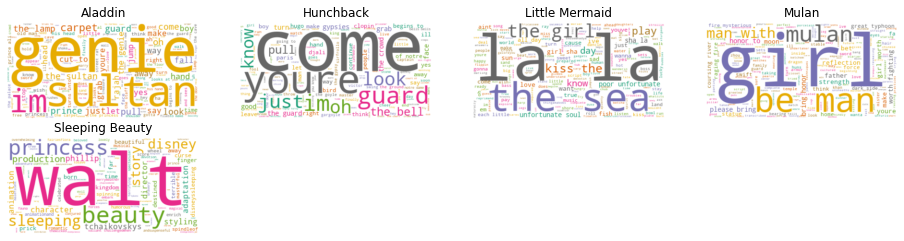

In [32]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Aladdin', 'Hunchback','Little Mermaid', 'Mulan', 'Sleeping Beauty']

# Create subplots for each 
for index, movies in enumerate(data.columns):
    wc.generate(data_clean.transcript[movies])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### B. Number of Words

In [33]:
unique_list = []
for movies in data.columns:
    uniques = data[movies].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['movies', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,movies,unique_words
4,Sleeping Beauty,117
3,Mulan,234
2,Little Mermaid,342
0,Aladdin,2557
1,Hunchback,2660


In [34]:

# Calculate the words per minute of each movie

# Find the total number of words that a movie uses
total_list = []
for movies in data.columns:
    totals = sum(data[movies])
    total_list.append(totals)
    
# movies  run times, in minutes

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,movies,unique_words,total_words,run_times,words_per_minute
4,Sleeping Beauty,117,139,76,1.828947
3,Mulan,234,347,88,3.943182
2,Little Mermaid,342,575,85,6.764706
1,Hunchback,2660,5958,95,62.715789
0,Aladdin,2557,8789,91,96.582418


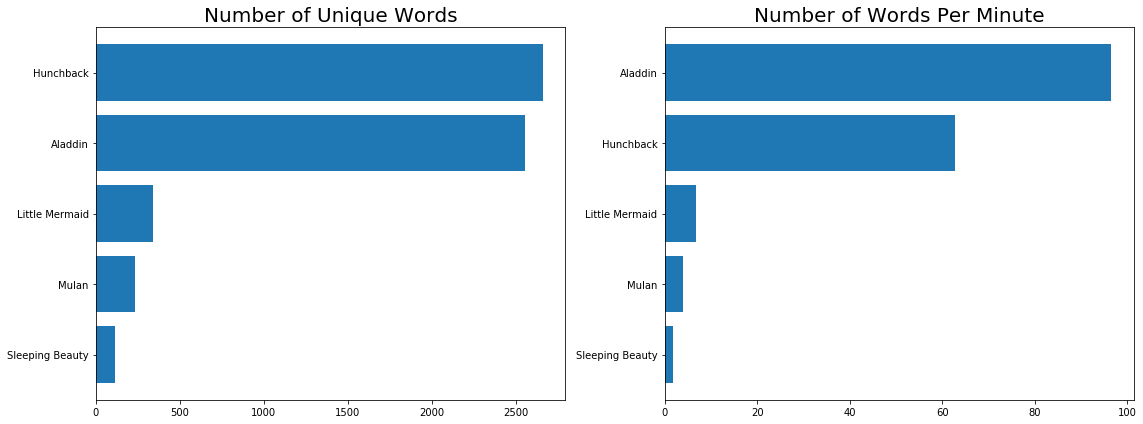

In [35]:
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.movies)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.movies)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

## III. Model 

In [36]:
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
Aladdin,ALADDIN: THE COMPLETE SCRIPT\r\nCOMPILED BY BEN SCRIPPS <34RQNPQ@CMUVM.CSV.CMICH.EDU>\r\n(Portions Copyright (c) 1992 The Walt Disney Company)\r\...,Aladdin
Hunchback,DISNEY'S THE HUNCHBACK OF NOTRE DAME\n\n\nTranscribed by Ben Scripps (belledisny@aol.com)\n (34rqnpq@cmuvm.csv.cmich.e...,Hunchback
Little Mermaid,The Complete Script \n \n \n I've got gadgets and gizmos aplenty\n I've got whozits and whatzits galore\n[You want thingamabobs?\n I got twe...,Little Mermaid
Mulan,The Complete Script \nTranscribed by Ash Ketchem.\n \n***\n \n***\n \n***\n \n A girl can bring her family\n Great honor in one way\n ...,Mulan
Sleeping Beauty,"\nWalt Disney's\nSleeping Beauty\n \nOnce upon a time, in a kingdom far away, a beautiful princess was born ...\na princess destined by a terrible...",Sleeping Beauty


In [37]:
conda install -c conda-forge textblob

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [38]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
Aladdin,ALADDIN: THE COMPLETE SCRIPT\r\nCOMPILED BY BEN SCRIPPS <34RQNPQ@CMUVM.CSV.CMICH.EDU>\r\n(Portions Copyright (c) 1992 The Walt Disney Company)\r\...,Aladdin,0.035073,0.542482
Hunchback,DISNEY'S THE HUNCHBACK OF NOTRE DAME\n\n\nTranscribed by Ben Scripps (belledisny@aol.com)\n (34rqnpq@cmuvm.csv.cmich.e...,Hunchback,0.028195,0.532848
Little Mermaid,The Complete Script \n \n \n I've got gadgets and gizmos aplenty\n I've got whozits and whatzits galore\n[You want thingamabobs?\n I got twe...,Little Mermaid,0.000362,0.574054
Mulan,The Complete Script \nTranscribed by Ash Ketchem.\n \n***\n \n***\n \n***\n \n A girl can bring her family\n Great honor in one way\n ...,Mulan,0.199329,0.499236
Sleeping Beauty,"\nWalt Disney's\nSleeping Beauty\n \nOnce upon a time, in a kingdom far away, a beautiful princess was born ...\na princess destined by a terrible...",Sleeping Beauty,0.190351,0.840351


### A.Sentiment analysis

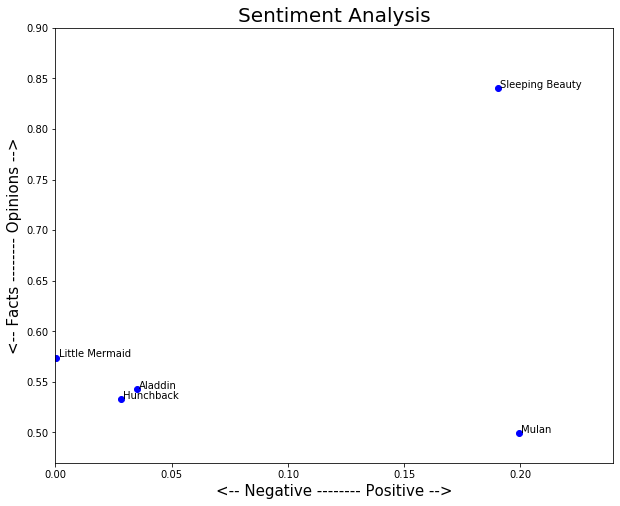

In [39]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-0, 0.24) 
    plt.ylim(0.47, 0.9) 

    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [40]:
import numpy as np
import math

def split_text(text, n=14):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [41]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[["ALADDIN:  THE COMPLETE SCRIPT\r\nCOMPILED BY BEN SCRIPPS <34RQNPQ@CMUVM.CSV.CMICH.EDU>\r\n(Portions Copyright (c) 1992 The Walt Disney Company)\r\n\r\nPEDDLER:    Oh I come from a land\r\n    From a faraway place\r\n    Where the caravan camels roam\r\n    Where they cut off your ear /Where it's flat and immense\r\n    If they don't like your face /And the heat is intense\r\n    It's barbaric, but hey--it's home!\r\n    When the wind's at your back\r\n    And the sun's from the west\r\n    And the sand in the glass is right\r\n    Come on down,\r\n    Stop on by\r\n    Hop a carpet and fly\r\n    To another Arabian night!\r\n\r\n    Arabian nights\r\n    Like Arabian days\r\n    More often than not\r\n    Are hotter than hot\r\n    In a lot of good ways\r\n\r\n    Arabian nights\r\n    'Neath Arabian moons\r\n    A fool off his guard\r\n    Could fall and fall hard\r\n    Out there on the dunes.\r\n\r\n    Ah, Salaam and good evening to you worthy friend.\r\n    Please, please, come

In [42]:
len(list_pieces)

5

In [43]:
len(list_pieces[0])

14

In [44]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.07927920687894896,
  0.012995517196455243,
  0.003965370062753786,
  -0.04052160258042611,
  -0.026379349816849876,
  -0.004056271419552676,
  -0.0380069036747119,
  0.11656747003123293,
  0.11206295890176338,
  0.06571203636970072,
  0.11367009114251767,
  0.11494576792016552,
  0.005340449481074467,
  -0.04800069412234592],
 [0.08330418547173869,
  0.05692110521488469,
  -0.01890073953823955,
  0.011459116619469549,
  -0.23108362268518517,
  0.03620739962651728,
  -0.013197021232735513,
  0.05131636303511303,
  0.08781225887345678,
  0.19155779736136877,
  0.08376645240281602,
  -0.043585371859181404,
  0.030748435592185586,
  0.05740111868584092],
 [0.10888888888888888,
  0.20275974025974025,
  0.26888888888888884,
  0.2712962962962963,
  0.04374999999999998,
  -0.029166666666666674,
  -0.21677350427350428,
  -0.17878787878787883,
  0.08499999999999999,
  -0.03902777777777777,
  -0.14895833333333333,
  0.1863095238095238,
  -0.18809523809523807,
  0.0],
 [0.5249999999999999,
  0

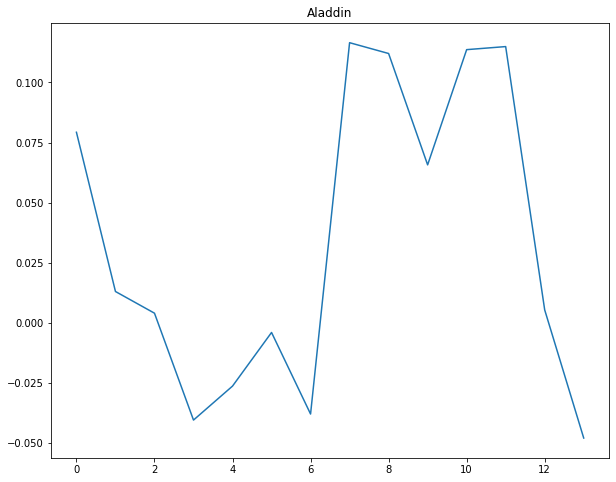

In [45]:
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

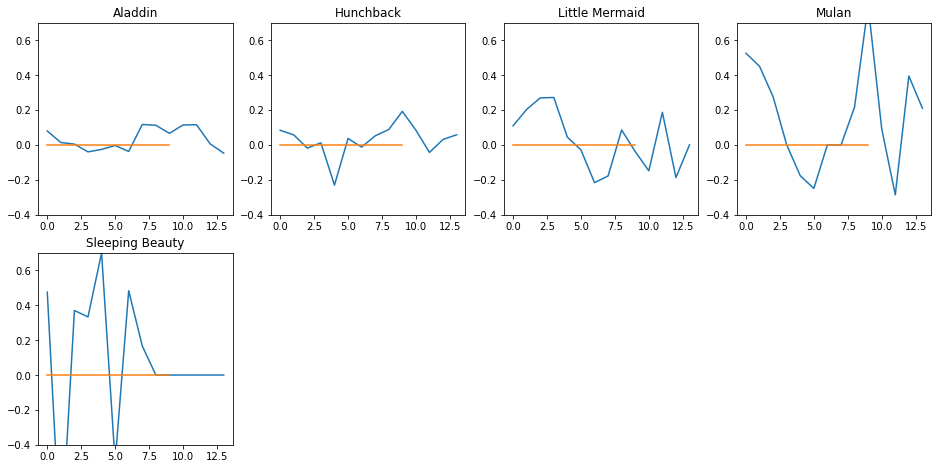

In [46]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.4, ymax=.7)

    
plt.show()

### B.Topic modelling

In [47]:
data = pd.read_pickle('dtm_stop.pkl')
data

,aaaaahhhhh,aawk,ababwa,abandoned,abject,able,abominationfrollo,abooboo,aboutfrollo,aboutmyself,...,zapped,zaps,zhou,zings,zips,zombie,zoo,zoom,zooms,zut
Aladdin,1,1,9,0,1,1,0,4,0,1,...,3,12,0,1,1,1,1,4,8,0
Hunchback,0,0,0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,2,1,0
Little Mermaid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Mulan,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
Sleeping Beauty,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
conda install -c conda-forge gensim

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [49]:
from gensim import matutils, models
import scipy.sparse

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [50]:
tdm = data.transpose()
tdm.head()


,Aladdin,Hunchback,Little Mermaid,Mulan,Sleeping Beauty
aaaaahhhhh,1,0,0,0,0
aawk,1,0,0,0,0
ababwa,9,0,0,0,0
abandoned,0,1,0,0,0
abject,1,0,0,0,0


In [51]:
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [52]:
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [53]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

2020-05-30 17:58:15,365 : INFO : using symmetric alpha at 0.5
2020-05-30 17:58:15,366 : INFO : using symmetric eta at 0.5
2020-05-30 17:58:15,370 : INFO : using serial LDA version on this node
2020-05-30 17:58:15,377 : INFO : running online (multi-pass) LDA training, 2 topics, 10 passes over the supplied corpus of 5 documents, updating model once every 5 documents, evaluating perplexity every 5 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-30 17:58:15,585 : INFO : -9.014 per-word bound, 516.9 perplexity estimate based on a held-out corpus of 5 documents with 14210 words
2020-05-30 17:58:15,587 : INFO : PROGRESS: pass 0, at document #5/5
2020-05-30 17:58:15,622 : INFO : topic #0 (0.500): 0.009*"genie" + 0.007*"sultan" + 0.006*"carpet" + 0.005*"im" + 0.005*"oh" + 0.004*"just" + 0.004*"prince" + 0.004*"guards" + 0.004*"right" + 0.004*"youre"
2020-05-30 17:58:15,626 : INFO : topic #1 (0.500): 0.009*"genie" + 0.008*"im" + 0.005*"oh" + 0.005*"youre" + 0.005*"sulta

[(0,
  '0.015*"genie" + 0.010*"sultan" + 0.008*"carpet" + 0.007*"im" + 0.006*"prince" + 0.006*"looks" + 0.005*"oh" + 0.005*"lamp" + 0.004*"just" + 0.004*"princess"'),
 (1,
  '0.006*"im" + 0.006*"youre" + 0.005*"guards" + 0.004*"just" + 0.004*"know" + 0.004*"come" + 0.004*"bells" + 0.004*"oh" + 0.004*"crowd" + 0.003*"right"')]

In [54]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

2020-05-30 17:58:17,079 : INFO : using symmetric alpha at 0.3333333333333333
2020-05-30 17:58:17,081 : INFO : using symmetric eta at 0.3333333333333333
2020-05-30 17:58:17,086 : INFO : using serial LDA version on this node
2020-05-30 17:58:17,091 : INFO : running online (multi-pass) LDA training, 3 topics, 10 passes over the supplied corpus of 5 documents, updating model once every 5 documents, evaluating perplexity every 5 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-30 17:58:17,212 : INFO : -9.306 per-word bound, 633.0 perplexity estimate based on a held-out corpus of 5 documents with 14210 words
2020-05-30 17:58:17,213 : INFO : PROGRESS: pass 0, at document #5/5
2020-05-30 17:58:17,238 : INFO : topic #0 (0.333): 0.011*"genie" + 0.006*"im" + 0.006*"sultan" + 0.006*"carpet" + 0.005*"looks" + 0.004*"just" + 0.004*"oh" + 0.004*"lamp" + 0.004*"prince" + 0.003*"know"
2020-05-30 17:58:17,240 : INFO : topic #1 (0.333): 0.008*"genie" + 0.006*"im" + 0.006*"oh" + 0

[(0,
  '0.018*"genie" + 0.012*"sultan" + 0.010*"carpet" + 0.008*"im" + 0.007*"prince" + 0.007*"looks" + 0.006*"lamp" + 0.006*"oh" + 0.005*"head" + 0.005*"just"'),
 (1,
  '0.006*"im" + 0.006*"youre" + 0.006*"guards" + 0.005*"know" + 0.005*"just" + 0.004*"come" + 0.004*"oh" + 0.004*"la" + 0.004*"bells" + 0.004*"crowd"'),
 (2,
  '0.007*"man" + 0.006*"girl" + 0.003*"bring" + 0.003*"honor" + 0.003*"mulan" + 0.002*"youre" + 0.002*"princess" + 0.002*"great" + 0.002*"fighting" + 0.002*"moon"')]

In [55]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

2020-05-30 17:58:18,660 : INFO : using symmetric alpha at 0.25
2020-05-30 17:58:18,664 : INFO : using symmetric eta at 0.25
2020-05-30 17:58:18,679 : INFO : using serial LDA version on this node
2020-05-30 17:58:18,686 : INFO : running online (multi-pass) LDA training, 4 topics, 10 passes over the supplied corpus of 5 documents, updating model once every 5 documents, evaluating perplexity every 5 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-30 17:58:18,822 : INFO : -9.652 per-word bound, 804.4 perplexity estimate based on a held-out corpus of 5 documents with 14210 words
2020-05-30 17:58:18,823 : INFO : PROGRESS: pass 0, at document #5/5
2020-05-30 17:58:18,878 : INFO : topic #0 (0.250): 0.009*"genie" + 0.006*"sultan" + 0.005*"im" + 0.005*"just" + 0.005*"la" + 0.004*"oh" + 0.004*"youre" + 0.004*"guards" + 0.003*"head" + 0.003*"looks"
2020-05-30 17:58:18,879 : INFO : topic #1 (0.250): 0.008*"im" + 0.008*"genie" + 0.006*"sultan" + 0.006*"oh" + 0.005*"carpet" 

[(0,
  '0.017*"la" + 0.009*"sea" + 0.008*"kiss" + 0.006*"girl" + 0.005*"day" + 0.005*"play" + 0.004*"know" + 0.004*"poor" + 0.004*"sha" + 0.004*"unfortunate"'),
 (1,
  '0.011*"genie" + 0.008*"im" + 0.007*"sultan" + 0.006*"carpet" + 0.006*"oh" + 0.005*"youre" + 0.005*"just" + 0.005*"guards" + 0.005*"looks" + 0.004*"prince"'),
 (2,
  '0.001*"genie" + 0.001*"sultan" + 0.001*"carpet" + 0.000*"im" + 0.000*"just" + 0.000*"looks" + 0.000*"oh" + 0.000*"prince" + 0.000*"pulls" + 0.000*"turns"'),
 (3,
  '0.003*"princess" + 0.003*"walt" + 0.003*"sleeping" + 0.003*"beauty" + 0.002*"disney" + 0.002*"story" + 0.002*"character" + 0.002*"adaptation" + 0.002*"tchaikovskys" + 0.002*"animation"')]

topic modelling with only the noun

In [56]:
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [57]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\benja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\benja\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [58]:
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
Aladdin,aladdin the complete script\rcompiled by ben scripps \rportions copyright c the walt disney company\r\rpeddler oh i come from a land\r fro...
Hunchback,disneys the hunchback of notre dametranscribed by ben scripps belledisnyaolcom note the following script is copyright...
Little Mermaid,the complete script ive got gadgets and gizmos aplenty ive got whozits and whatzits galoreyou want thingamabobs i got twenty but who ca...
Mulan,the complete script transcribed by ash ketchem a girl can bring her family great honor in one way by striking a good match and...
Sleeping Beauty,walt disneyssleeping beauty once upon a time in a kingdom far away a beautiful princess was born a princess destined by a terrible curse to prick ...


In [59]:
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
Aladdin,script ben scripps portions walt disney company peddler land faraway place caravan camels ear face heat home winds back suns west sand glass come ...
Hunchback,hunchback ben scripps belledisnyaolcom script walt disney company purpose transcription research reference purposes case script charges note scrip...
Little Mermaid,script gadgets gizmos whozits whatzits thingamabobs i deal i wan people na dancin walkin thosewhadya call feet fins legs jumpin dancin strollin st...
Mulan,script ash ketchem girl family honor way match day emperor huns man arms girl sons undertaker matchmaker girls future please pearls porcelain doll...
Sleeping Beauty,walt beauty time kingdom princess princess curse finger spindleof spinning wheel beauty disney animationand tchaikovskys score story princess fair...


In [60]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,aaaaahhhhh,aawk,ababwa,abominationfrollo,abooboo,abu,abuhe,abui,abus,abyss,...,youve,youvictor,yuck,zaps,zhou,zombie,zoo,zoom,zooms,zut
Aladdin,1,1,3,0,2,82,1,1,3,0,...,6,0,1,4,0,1,1,1,3,0
Hunchback,0,0,0,1,0,0,0,0,0,1,...,6,2,0,0,0,0,0,2,0,0
Little Mermaid,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,1
Mulan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Sleeping Beauty,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [62]:
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

2020-05-30 17:58:24,335 : INFO : using symmetric alpha at 0.5
2020-05-30 17:58:24,338 : INFO : using symmetric eta at 0.5
2020-05-30 17:58:24,343 : INFO : using serial LDA version on this node
2020-05-30 17:58:24,347 : INFO : running online (multi-pass) LDA training, 2 topics, 10 passes over the supplied corpus of 5 documents, updating model once every 5 documents, evaluating perplexity every 5 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-30 17:58:24,453 : INFO : -8.434 per-word bound, 345.9 perplexity estimate based on a held-out corpus of 5 documents with 7462 words
2020-05-30 17:58:24,454 : INFO : PROGRESS: pass 0, at document #5/5
2020-05-30 17:58:24,476 : INFO : topic #0 (0.500): 0.012*"aladdin" + 0.009*"genie" + 0.009*"jasmine" + 0.008*"jafar" + 0.007*"guards" + 0.007*"man" + 0.006*"abu" + 0.005*"carpet" + 0.005*"phoebus" + 0.005*"prince"
2020-05-30 17:58:24,479 : INFO : topic #1 (0.500): 0.019*"aladdin" + 0.018*"jasmine" + 0.017*"jafar" + 0.014*"geni

[(0,
  '0.010*"phoebus" + 0.009*"guards" + 0.008*"frollo" + 0.007*"girl" + 0.007*"quasi" + 0.007*"esmeralda" + 0.006*"bells" + 0.006*"man" + 0.006*"day" + 0.005*"crowd"'),
 (1,
  '0.030*"aladdin" + 0.026*"jasmine" + 0.025*"jafar" + 0.021*"genie" + 0.015*"carpet" + 0.015*"abu" + 0.011*"prince" + 0.010*"sultan" + 0.009*"lamp" + 0.008*"iago"')]

In [63]:
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

2020-05-30 17:58:25,220 : INFO : using symmetric alpha at 0.3333333333333333
2020-05-30 17:58:25,228 : INFO : using symmetric eta at 0.3333333333333333
2020-05-30 17:58:25,233 : INFO : using serial LDA version on this node
2020-05-30 17:58:25,237 : INFO : running online (multi-pass) LDA training, 3 topics, 10 passes over the supplied corpus of 5 documents, updating model once every 5 documents, evaluating perplexity every 5 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-30 17:58:25,349 : INFO : -8.738 per-word bound, 427.1 perplexity estimate based on a held-out corpus of 5 documents with 7462 words
2020-05-30 17:58:25,351 : INFO : PROGRESS: pass 0, at document #5/5
2020-05-30 17:58:25,385 : INFO : topic #0 (0.333): 0.018*"aladdin" + 0.013*"jasmine" + 0.011*"jafar" + 0.009*"genie" + 0.009*"abu" + 0.008*"carpet" + 0.007*"guards" + 0.006*"sultan" + 0.005*"prince" + 0.005*"lamp"
2020-05-30 17:58:25,387 : INFO : topic #1 (0.333): 0.022*"aladdin" + 0.021*"jasmine"

[(0,
  '0.005*"princess" + 0.004*"walt" + 0.003*"disney" + 0.003*"story" + 0.003*"beauty" + 0.002*"animation" + 0.002*"tchaikovskys" + 0.002*"production" + 0.002*"adaptation" + 0.001*"prince"'),
 (1,
  '0.031*"aladdin" + 0.028*"jasmine" + 0.026*"jafar" + 0.023*"genie" + 0.016*"carpet" + 0.016*"abu" + 0.011*"prince" + 0.010*"sultan" + 0.010*"lamp" + 0.009*"man"'),
 (2,
  '0.011*"phoebus" + 0.011*"guards" + 0.009*"frollo" + 0.008*"esmeralda" + 0.008*"quasi" + 0.007*"bells" + 0.006*"day" + 0.006*"crowd" + 0.006*"girl" + 0.005*"quasimodo"')]

In [64]:
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

2020-05-30 17:58:26,284 : INFO : using symmetric alpha at 0.25
2020-05-30 17:58:26,286 : INFO : using symmetric eta at 0.25
2020-05-30 17:58:26,289 : INFO : using serial LDA version on this node
2020-05-30 17:58:26,294 : INFO : running online (multi-pass) LDA training, 4 topics, 10 passes over the supplied corpus of 5 documents, updating model once every 5 documents, evaluating perplexity every 5 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-30 17:58:26,362 : INFO : -9.108 per-word bound, 551.9 perplexity estimate based on a held-out corpus of 5 documents with 7462 words
2020-05-30 17:58:26,364 : INFO : PROGRESS: pass 0, at document #5/5
2020-05-30 17:58:26,384 : INFO : topic #0 (0.250): 0.010*"jasmine" + 0.009*"jafar" + 0.007*"aladdin" + 0.007*"man" + 0.006*"genie" + 0.006*"carpet" + 0.006*"princess" + 0.005*"prince" + 0.004*"phoebus" + 0.004*"guards"
2020-05-30 17:58:26,386 : INFO : topic #1 (0.250): 0.019*"aladdin" + 0.016*"jasmine" + 0.014*"genie" + 0.01

[(0,
  '0.015*"man" + 0.010*"girl" + 0.007*"honor" + 0.006*"mulan" + 0.005*"princess" + 0.005*"walt" + 0.005*"reflection" + 0.005*"moon" + 0.005*"strength" + 0.004*"disney"'),
 (1,
  '0.001*"aladdin" + 0.001*"jasmine" + 0.001*"genie" + 0.001*"jafar" + 0.001*"abu" + 0.001*"carpet" + 0.001*"guards" + 0.001*"sultan" + 0.001*"prince" + 0.001*"man"'),
 (2,
  '0.012*"phoebus" + 0.012*"guards" + 0.009*"frollo" + 0.008*"esmeralda" + 0.008*"quasi" + 0.008*"bells" + 0.007*"day" + 0.007*"crowd" + 0.006*"girl" + 0.006*"quasimodo"'),
 (3,
  '0.034*"aladdin" + 0.030*"jasmine" + 0.028*"jafar" + 0.024*"genie" + 0.017*"carpet" + 0.017*"abu" + 0.012*"prince" + 0.011*"sultan" + 0.010*"lamp" + 0.009*"iago"')]

Only name and adjectives

In [65]:
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [66]:
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj


,transcript
Aladdin,complete script ben scripps portions walt disney company peddler i land faraway place caravan camels ear flat immense face heat intense barbaric h...
Hunchback,hunchback notre ben scripps belledisnyaolcom following script copyright walt disney company purpose transcription research reference purposes case...
Little Mermaid,complete script ive gadgets gizmos ive whozits whatzits thingamabobs i big deal i more i wan people i wan na em dancin walkin thosewhadya call oh ...
Mulan,complete script ash ketchem girl family great honor way good match day emperor huns man arms girl sons scarier undertaker matchmaker girls future ...
Sleeping Beauty,walt beauty time kingdom beautiful princess princess terrible curse finger spindleof spinning wheel sleeping beauty masterful disney animationand ...


In [67]:
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aaaaahhhhh,aawk,ababwa,abject,able,abominationfrollo,abooboo,aboutfrollo,aboutmyself,abovehugo,...,youve,youvictor,yuck,zaps,zhou,zombie,zoo,zoom,zooms,zut
Aladdin,1,1,5,1,1,0,3,0,1,0,...,7,0,1,4,0,1,1,1,3,0
Hunchback,0,0,0,0,1,1,0,1,0,1,...,7,2,0,0,0,0,0,2,0,0
Little Mermaid,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,1
Mulan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Sleeping Beauty,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())


In [69]:
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()


2020-05-30 17:58:29,866 : INFO : using symmetric alpha at 0.5
2020-05-30 17:58:29,868 : INFO : using symmetric eta at 0.5
2020-05-30 17:58:29,872 : INFO : using serial LDA version on this node
2020-05-30 17:58:29,877 : INFO : running online (multi-pass) LDA training, 2 topics, 10 passes over the supplied corpus of 5 documents, updating model once every 5 documents, evaluating perplexity every 5 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-30 17:58:29,955 : INFO : -8.662 per-word bound, 405.2 perplexity estimate based on a held-out corpus of 5 documents with 9545 words
2020-05-30 17:58:29,957 : INFO : PROGRESS: pass 0, at document #5/5
2020-05-30 17:58:29,986 : INFO : topic #0 (0.500): 0.023*"aladdin" + 0.016*"jasmine" + 0.014*"jafar" + 0.013*"genie" + 0.011*"abu" + 0.009*"carpet" + 0.008*"sultan" + 0.006*"prince" + 0.006*"iago" + 0.005*"guards"
2020-05-30 17:58:29,988 : INFO : topic #1 (0.500): 0.014*"aladdin" + 0.011*"jafar" + 0.009*"jasmine" + 0.008*"abu"

[(0,
  '0.036*"aladdin" + 0.024*"jafar" + 0.024*"jasmine" + 0.019*"genie" + 0.017*"abu" + 0.014*"sultan" + 0.012*"carpet" + 0.008*"iago" + 0.008*"prince" + 0.008*"lamp"'),
 (1,
  '0.009*"phoebus" + 0.009*"frollo" + 0.008*"quasi" + 0.008*"esmeralda" + 0.007*"guards" + 0.006*"girl" + 0.005*"quasimodo" + 0.005*"bells" + 0.005*"man" + 0.005*"crowd"')]

In [70]:
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()


2020-05-30 17:58:30,756 : INFO : using symmetric alpha at 0.3333333333333333
2020-05-30 17:58:30,759 : INFO : using symmetric eta at 0.3333333333333333
2020-05-30 17:58:30,762 : INFO : using serial LDA version on this node
2020-05-30 17:58:30,766 : INFO : running online (multi-pass) LDA training, 3 topics, 10 passes over the supplied corpus of 5 documents, updating model once every 5 documents, evaluating perplexity every 5 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-30 17:58:30,855 : INFO : -8.960 per-word bound, 497.9 perplexity estimate based on a held-out corpus of 5 documents with 9545 words
2020-05-30 17:58:30,856 : INFO : PROGRESS: pass 0, at document #5/5
2020-05-30 17:58:30,897 : INFO : topic #0 (0.333): 0.013*"aladdin" + 0.009*"jasmine" + 0.008*"jafar" + 0.007*"abu" + 0.006*"sultan" + 0.006*"genie" + 0.005*"man" + 0.005*"frollo" + 0.004*"carpet" + 0.004*"guards"
2020-05-30 17:58:30,899 : INFO : topic #1 (0.333): 0.021*"aladdin" + 0.021*"jasmine" 

[(0,
  '0.014*"girl" + 0.010*"sea" + 0.009*"man" + 0.005*"day" + 0.004*"ive" + 0.004*"la" + 0.004*"poor" + 0.004*"mulan" + 0.004*"honor" + 0.004*"sha"'),
 (1,
  '0.039*"aladdin" + 0.026*"jafar" + 0.026*"jasmine" + 0.021*"genie" + 0.019*"abu" + 0.015*"sultan" + 0.013*"carpet" + 0.009*"iago" + 0.009*"prince" + 0.009*"lamp"'),
 (2,
  '0.012*"phoebus" + 0.011*"frollo" + 0.010*"quasi" + 0.009*"esmeralda" + 0.009*"guards" + 0.006*"quasimodo" + 0.006*"bells" + 0.006*"crowd" + 0.004*"notre" + 0.004*"gypsies"')]

In [71]:
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()


2020-05-30 17:58:31,966 : INFO : using symmetric alpha at 0.25
2020-05-30 17:58:31,968 : INFO : using symmetric eta at 0.25
2020-05-30 17:58:31,971 : INFO : using serial LDA version on this node
2020-05-30 17:58:31,976 : INFO : running online (multi-pass) LDA training, 4 topics, 10 passes over the supplied corpus of 5 documents, updating model once every 5 documents, evaluating perplexity every 5 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-30 17:58:32,053 : INFO : -9.325 per-word bound, 641.4 perplexity estimate based on a held-out corpus of 5 documents with 9545 words
2020-05-30 17:58:32,054 : INFO : PROGRESS: pass 0, at document #5/5
2020-05-30 17:58:32,073 : INFO : topic #0 (0.250): 0.024*"aladdin" + 0.014*"jasmine" + 0.014*"genie" + 0.012*"jafar" + 0.010*"abu" + 0.008*"sultan" + 0.005*"lamp" + 0.005*"carpet" + 0.005*"iago" + 0.005*"prince"
2020-05-30 17:58:32,074 : INFO : topic #1 (0.250): 0.019*"aladdin" + 0.017*"jafar" + 0.014*"jasmine" + 0.012*"abu"

[(0,
  '0.001*"aladdin" + 0.001*"jasmine" + 0.001*"genie" + 0.001*"jafar" + 0.001*"abu" + 0.001*"sultan" + 0.000*"lamp" + 0.000*"carpet" + 0.000*"iago" + 0.000*"prince"'),
 (1,
  '0.040*"aladdin" + 0.027*"jafar" + 0.027*"jasmine" + 0.022*"genie" + 0.019*"abu" + 0.015*"sultan" + 0.014*"carpet" + 0.009*"iago" + 0.009*"prince" + 0.009*"lamp"'),
 (2,
  '0.011*"phoebus" + 0.011*"frollo" + 0.010*"quasi" + 0.009*"esmeralda" + 0.009*"guards" + 0.006*"quasimodo" + 0.006*"bells" + 0.006*"crowd" + 0.005*"day" + 0.005*"girl"'),
 (3,
  '0.013*"man" + 0.012*"girl" + 0.006*"mulan" + 0.006*"honor" + 0.004*"great" + 0.004*"moon" + 0.004*"reflection" + 0.004*"strength" + 0.003*"dark" + 0.003*"home"')]

In [72]:
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

2020-05-30 17:58:33,036 : INFO : using symmetric alpha at 0.25
2020-05-30 17:58:33,037 : INFO : using symmetric eta at 0.25
2020-05-30 17:58:33,041 : INFO : using serial LDA version on this node
2020-05-30 17:58:33,045 : INFO : running online (multi-pass) LDA training, 4 topics, 80 passes over the supplied corpus of 5 documents, updating model once every 5 documents, evaluating perplexity every 5 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-30 17:58:33,126 : INFO : -9.318 per-word bound, 638.4 perplexity estimate based on a held-out corpus of 5 documents with 9545 words
2020-05-30 17:58:33,127 : INFO : PROGRESS: pass 0, at document #5/5
2020-05-30 17:58:33,148 : INFO : topic #0 (0.250): 0.016*"aladdin" + 0.016*"jafar" + 0.012*"jasmine" + 0.009*"abu" + 0.008*"genie" + 0.007*"guards" + 0.006*"sultan" + 0.006*"carpet" + 0.006*"quasi" + 0.005*"phoebus"
2020-05-30 17:58:33,149 : INFO : topic #1 (0.250): 0.022*"aladdin" + 0.015*"jasmine" + 0.014*"genie" + 0.014*"

[(0,
  '0.012*"phoebus" + 0.012*"frollo" + 0.010*"quasi" + 0.010*"esmeralda" + 0.010*"guards" + 0.007*"quasimodo" + 0.006*"bells" + 0.006*"crowd" + 0.005*"gypsies" + 0.005*"notre"'),
 (1,
  '0.038*"aladdin" + 0.025*"jafar" + 0.025*"jasmine" + 0.021*"genie" + 0.018*"abu" + 0.015*"sultan" + 0.013*"carpet" + 0.009*"iago" + 0.009*"prince" + 0.009*"lamp"'),
 (2,
  '0.000*"prince" + 0.000*"thrilling" + 0.000*"wheel" + 0.000*"director" + 0.000*"tree" + 0.000*"sequence" + 0.000*"lovely" + 0.000*"kingdom" + 0.000*"scale" + 0.000*"magical"'),
 (3,
  '0.014*"man" + 0.012*"girl" + 0.006*"mulan" + 0.006*"honor" + 0.004*"moon" + 0.004*"reflection" + 0.004*"great" + 0.004*"strength" + 0.003*"statue" + 0.003*"river"')]

In [73]:
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(1, 'Aladdin'),
 (0, 'Hunchback'),
 (1, 'Little Mermaid'),
 (3, 'Mulan'),
 (0, 'Sleeping Beauty')]

### C. Text generation

## IV. Conclusion